# Thamalu Maliththa to be beaten

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")


In [2]:
y_train=train.pop("SalePrice")


In [3]:
# remove train cols
train.drop(["PoolQC", "MiscFeature"],axis=1,inplace=True)   

train["Fence"][train["Fence"].notna()]=1
train["Fence"]=train["Fence"].fillna(0)
train["Fence"]=pd.to_numeric(train["Fence"])


train["Alley"][train["Alley"].notna()]=1
train["Alley"]=train["Alley"].fillna(0)
train["Alley"]=pd.to_numeric(train["Alley"])


# remove test cols
test.drop(["PoolQC", "MiscFeature"],axis=1,inplace=True)   

test["Fence"][test["Fence"].notna()]=1
test["Fence"]=test["Fence"].fillna(0)
test["Fence"]=pd.to_numeric(test["Fence"])


test["Alley"][test["Alley"].notna()]=1
test["Alley"]=test["Alley"].fillna(0)
test["Alley"]=pd.to_numeric(test["Alley"])




<ipython-input-3-1acea2d66e31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Fence"][train["Fence"].notna()]=1
<ipython-input-3-1acea2d66e31>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Alley"][train["Alley"].notna()]=1
<ipython-input-3-1acea2d66e31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Fence"][test["Fence"].notna()]=1
<ipython-input-3-1acea2d66e31>:22: SettingWithCopyWarning: 
A value is trying

In [4]:
#train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0]
train["FireplaceQu"]=train["FireplaceQu"].fillna("No")
test["FireplaceQu"]=test["FireplaceQu"].fillna("No")

In [5]:
t1=train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0]
cols_to_impute_train=t1.index
t2=test[test.columns[test.isnull().any()]].isnull().sum() * 100 / test.shape[0]
cols_to_impute_test=t2.index

In [6]:
binaryEncodingColumns =['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st',
                        'Exterior2nd']

In [7]:
onehotEncodingColumns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
 'BldgType', 'RoofStyle', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
 'GarageType', 'PavedDrive', 'SaleCondition','SaleType']

In [8]:
labelEncodingColumns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']

In [9]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [10]:
train[cols_to_impute_train] = DataFrameImputer().fit_transform(train[cols_to_impute_train])
test[cols_to_impute_test] = DataFrameImputer().fit_transform(test[cols_to_impute_test])

In [11]:
train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0]
test[test.columns[test.isnull().any()]].isnull().sum() * 100 / test.shape[0]

Series([], dtype: float64)

In [12]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [13]:
label_encoder = LabelEncoder()
for col in labelEncodingColumns:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.transform(test[col])

In [14]:
print(train.shape)
print(test.shape)

(1460, 78)
(1459, 78)


In [15]:
from sklearn.preprocessing import OneHotEncoder

In [16]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[onehotEncodingColumns]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test[onehotEncodingColumns]))

# One-hot encoding removed index; put it back
OH_cols_train.index = train[onehotEncodingColumns].index
OH_cols_test.index = test[onehotEncodingColumns].index


In [17]:
num_X_train = train.drop(onehotEncodingColumns, axis=1)
num_X_test = test.drop(onehotEncodingColumns, axis=1)
train = pd.concat([num_X_train, OH_cols_train], axis=1)
test = pd.concat([num_X_test, OH_cols_test], axis=1)


In [18]:
train[train.columns[train.isnull().any()]].isnull().sum() * 100 / train.shape[0]
test[test.columns[test.isnull().any()]].isnull().sum() * 100 / test.shape[0]

Series([], dtype: float64)

In [19]:
print(train.shape)
print(test.shape)

(1460, 149)
(1459, 149)


In [20]:
encoder= ce.BinaryEncoder(cols=binaryEncodingColumns,return_df=True)
data_encoded_train=encoder.fit_transform(train[binaryEncodingColumns])
data_encoded_test = encoder.transform(test[binaryEncodingColumns])
train = train.drop(binaryEncodingColumns, axis=1)
test = test.drop(binaryEncodingColumns, axis=1)

train = pd.concat([train, data_encoded_train], axis=1)
test = pd.concat([test, data_encoded_test], axis=1)

In [21]:
print(train.shape)
print(test.shape)

(1460, 175)
(1459, 175)


In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from xgboost import XGBClassifier
model4 = XGBClassifier()

model5 = XGBClassifier(n_estimators=1000, learning_rate=0.05, n_jobs=4)

LinearReg = LinearRegression()
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/abishek/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/abishek/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [25]:
for i in train.columns:
    if train[i].dtype not in (['int64','float64']):
        print(type(i))

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

R-squared: 0.9017163955947799


Text(0, 0.5, 'Residuals')

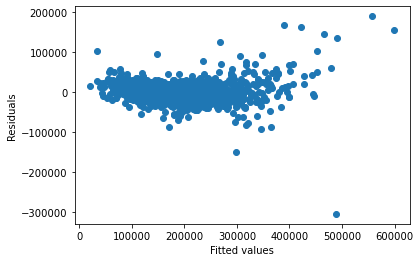

In [55]:

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('model', LinearReg)])

# Preprocessing of training data, fit model 
my_pipeline.fit(train, y_train)

# Preprocessing of validation data, get predictions
y_predicted = my_pipeline.predict(train)

# Evaluate the model
print("R-squared: {0}".format(r2_score(y_train,y_predicted)))
plt.scatter(y_predicted, (y_train-y_predicted))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")